In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#homework, module 9, case study2.
#Cars (mtcars) dataset
# build kmeans with 3 clusters
# car_features=['MPG', 'Disp', 'HP']

df=pd.read_csv('cars.csv')
df.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.shape

(32, 12)

In [4]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Class']= le.fit_transform(df['Model '])


In [5]:
df.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,Class
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,17
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,18
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,12
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,13


In [6]:
X1= df.iloc[:,1:12]
Y1= df.iloc[:,-1]

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(criterion='entropy', random_state=1)
tree.fit(X1, Y1)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [8]:
imp= pd.DataFrame(index=X1.columns, data=tree.feature_importances_, columns=['Imp'] )
imp.sort_values(by='Imp', ascending=False)

,Imp
Disp,0.3250
Qsec,0.3125
Drat,0.1000
Cylinder,0.0625
HP,0.0500
Wt,0.0500
MPG,0.0375
Carb,0.0375
AM,0.0250
VS,0.0000


In [47]:
car_features=df[['MPG', 'Disp','HP']]

In [48]:
#X=df[['MPG', 'Disp','HP']]
Y= df.iloc[:,0]

In [49]:
from sklearn.cluster import KMeans
#using elbow method to find no of clusters
wcss=[]
for i in range(1,7):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(car_features)
    wcss.append(kmeans.inertia_)

In [50]:
print(wcss)

[628108.245625, 151860.97793650787, 94502.19425595237, 66504.68558928571, 46652.90291125541, 37244.86541666667]


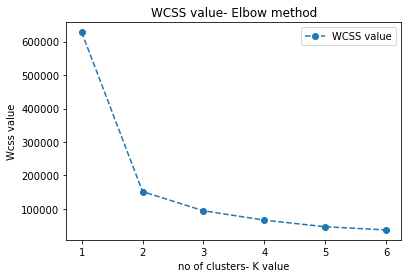

In [51]:
plt.plot(range(1,7), wcss, linestyle='--', marker='o', label='WCSS value')
plt.title('WCSS value- Elbow method')
plt.xlabel('no of clusters- K value')
plt.ylabel('Wcss value')
plt.legend()
plt.show()

In [52]:
kmeans= KMeans(n_clusters=3, random_state=1)
kmeans.fit(car_features)

KMeans(n_clusters=3, random_state=1)

In [61]:
kmeans.predict(car_features)

array([4, 4, 0, 1, 1, 4, 2, 0, 0, 4, 4, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 1,
       1, 2, 3, 0, 0, 0, 2, 4, 2, 0], dtype=int32)

In [53]:
#Cluster Center
kmeans.cluster_centers_

array([[ 17.01428571, 274.4       , 157.85714286],
       [ 14.64444444, 388.22222222, 232.11111111],
       [ 24.5       , 122.38125   ,  95.4375    ]])

In [54]:
df['cluster']=kmeans.predict(car_features)
df.sort_values(by='cluster').head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0
13,Merc 450SLC,15.2,8,275.8,210,3.07,3.780,18.00,0,0,3,3,0
12,Merc 450SL,17.3,8,270.0,200,3.07,3.730,17.60,0,0,3,3,0


In [55]:
df.cluster.unique()

array([2, 0, 1], dtype=int32)

In [56]:

cluster_0_df=df[(df['cluster']==0)]
cluster_0_df

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0
11,Merc 450SE,16.4,8,270.0,180,3.07,4.070,17.40,0,0,3,3,0
12,Merc 450SL,17.3,8,270.0,200,3.07,3.730,17.60,0,0,3,3,0
13,Merc 450SLC,15.2,8,275.8,210,3.07,3.780,18.00,0,0,3,3,0
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,0
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,0


In [57]:
cluster_1_df=df[(df['cluster']==1)]
cluster_1_df

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,1
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,1
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,1
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4,1
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2,1
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,1
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,1


In [58]:
cluster_2_df=df[(df['cluster']==2)]
cluster_2_df

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,2
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,2
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,2
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,2
9,Merc 280,19.2,6,169.0,100,3.92,3.440,18.30,1,0,4,4,2
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,2


In [ ]:
#homework - module 9 - assignment 2:
#on the same 'car_features' dataset buil dk-means algorithm where the number of cluster is 5
#bind the clustering vector to 'car_features' 
#extract observations belonging to individual clusters

In [67]:
##### car_features=df[['MPG', 'Disp','HP']]



kmeans5= KMeans(n_clusters=5, random_state=1)
kmeans5.fit(car_features)

KMeans(n_clusters=5, random_state=1)

In [68]:
kmeans5.predict(car_features)

array([4, 4, 0, 1, 1, 4, 2, 0, 0, 4, 4, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 1,
       1, 2, 3, 0, 0, 0, 2, 4, 2, 0], dtype=int32)

In [69]:
kmeans5.cluster_centers_

array([[ 26.66363636, 105.13636364,  82.63636364],
       [ 17.1       , 293.68571429, 167.85714286],
       [ 14.6       , 340.5       , 272.25      ],
       [ 13.675     , 443.        , 206.25      ],
       [ 19.46666667, 171.1       , 120.5       ]])

In [72]:
df['cluster5']=kmeans5.predict(car_features)
df.sort_values(by='cluster').head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster,cluster5
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2,0,0
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,0,0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0,0
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,0,0
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,0,0


In [73]:
df.cluster5.unique()

array([4, 0, 1, 2, 3], dtype=int32)

In [74]:
cluster5_0_df=df[(df['cluster']==0)]
cluster5_0_df

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster,cluster5
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0,0
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0,0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0,0
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,0,0
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,0,0
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,0,0
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,0,0
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,0,0
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2,0,0
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,0,0


In [76]:
cluster5_1_df=df[(df['cluster']==1)]
cluster5_1_df

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster,cluster5
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,1
11,Merc 450SE,16.4,8,270.0,180,3.07,4.070,17.40,0,0,3,3,1,1
12,Merc 450SL,17.3,8,270.0,200,3.07,3.730,17.60,0,0,3,3,1,1
13,Merc 450SLC,15.2,8,275.8,210,3.07,3.780,18.00,0,0,3,3,1,1
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,1,1
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,1,1


In [77]:
cluster5_2_df=df[(df['cluster']==2)]
cluster5_2_df

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster,cluster5
6,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4,2,2
23,Camaro Z28,13.3,8,350.0,245,3.73,3.84,15.41,0,0,3,4,2,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.17,14.50,0,1,5,4,2,2
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.60,0,1,5,8,2,2


In [78]:
cluster5_3_df=df[(df['cluster']==3)]
cluster5_3_df

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster,cluster5
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,3,3
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,3,3
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,3,3
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2,3,3


In [79]:
cluster5_4_df=df[(df['cluster']==4)]
cluster5_4_df

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,cluster,cluster5
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4,4
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,4,4
9,Merc 280,19.2,6,169.0,100,3.92,3.440,18.30,1,0,4,4,4,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,4,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,4,4
